AUTORZY:

Klaudia Kromołowska - kromolowska@student.agh.edu.pl - numer indeksu 303247

Jędrzej Kosior - jkosior@student.agh.edu.pl - numer indeksu 303124



In [83]:
import gym
import numpy as np

import matplotlib.pyplot as plt

from collections import defaultdict


class Agent:
    def __init__(self, action_space, gamma=0.99, alpha=0.5, epsilon=0.1):
        self.Q = defaultdict(float)
        self.action_space = action_space
        self.actions = range(0, action_space.n)
        self.gamma = gamma  # discounting factor
        self.alpha = alpha  # soft update param

        self.epsilon = epsilon  # chance to apply a random action

    def update_Q(self, s, r, a, s_next, done):
        max_q_next = max([self.Q[str(s_next), a] for a in self.actions])
        # Do not include the next state's value if currently at the terminal state.
        sstr = str(s)
        self.Q[sstr, a] += self.alpha * (r + self.gamma * max_q_next * (1.0 - done) - self.Q[sstr, a])

    def act(self, ob, explore=True):
        if explore and np.random.random() < self.epsilon:
            # action_space.sample() selects a random action
            # that is compatible with this given action space.
            return self.action_space.sample()

        # Pick the action with highest q value.
        qvals = {a: self.Q[str(ob), a] for a in self.actions}
        max_q = max(qvals.values())
        # In case multiple actions have the same maximum q value.
        actions_with_max_q = [a for a, q in qvals.items() if q == max_q]
        return np.random.choice(actions_with_max_q)


def test(a,e):
    env = gym.make("FrozenLake8x8-v0")
    #env = gym.make("Taxi-v3")

    n_epochs = 5000
    turn_limit = 100
    n_validation_trials = 100

    agent = Agent(env.action_space, alpha=a, epsilon=e)

    validation_rewards = []
    validation_epochs = []
    R=0

    for epoch in range(n_epochs):
        # training

        state = env.reset()

        for t in range(turn_limit):
            action = agent.act(state)
            next_state, current_reward, done, _ = env.step(action)

            agent.update_Q(state, current_reward, action, next_state, done)
            if done:
                break
            else:
                state = next_state

        # testing
        if epoch % 10 == 0:
            validation_epochs.append(epoch)
            reward = 0.0
            for k in range(n_validation_trials):
                state = env.reset()
                for t in range(turn_limit):
                    action = agent.act(state, explore=False)
                    next_state, current_reward, done, _ = env.step(action)
                    if done:
                        reward += current_reward
                        break
                    else:
                        state = next_state
            validation_rewards.append(reward/n_validation_trials)


    env.close()
    return (validation_epochs, validation_rewards, max(validation_rewards), agent, env)
    




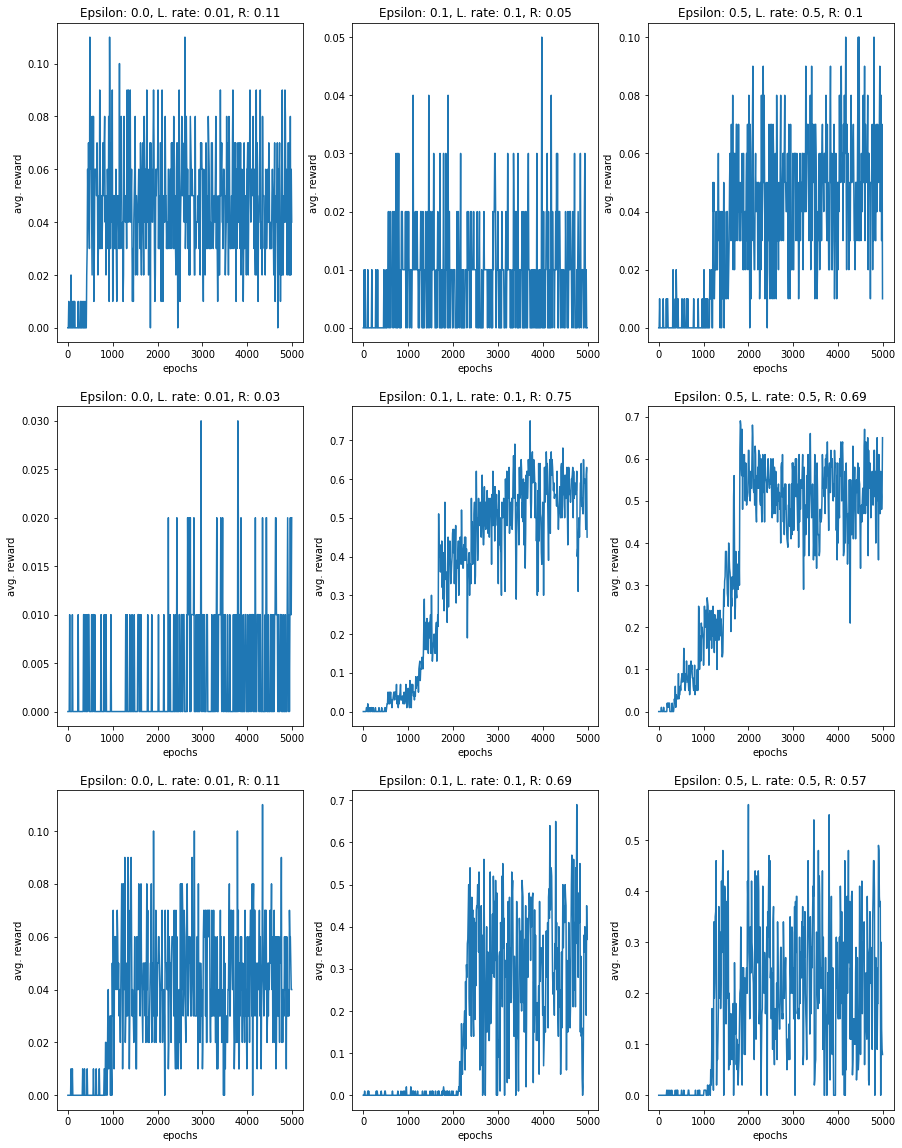

In [84]:
#Tworzymy wykresy dla różnych wartości epsilon i learining rate
fig, ax = plt.subplots(3,3, figsize=(15,20))
a = [0.01, 0.1, 0.5]
e = [0.0,0.1,0.5]
for i in range(0,3):
 for j in range(0,3):
   x,y,z,agent,env=test(a[i],e[j])
   title= "".join(["Epsilon: ", str(e[j]), ", L. rate: ", str(a[j]), ", R: ",str(z)])
   ax[i][j].set_title(title)
   ax[i][j].set_xlabel('epochs')
   ax[i][j].set_ylabel('avg. reward')
   ax[i][j].plot(x,y)  


Wartości dla których algorytm najlepiej zbiegał to alpha=0.5 i epsilon = 0.5


In [86]:
x,y,z,agent,env =test(0.1,0.1)

In [87]:
# #tworzenie listy wartości poszczególnych akcji dla kolejnych stanów
import numpy
stateList= numpy.zeros((64,5))

i=0
j=1
l=0
for v,x in agent.Q.items():
  stateList[i][0]=int(v[0])
  stateList[i][j]=x
  j=j+1
  l=l+1
  if l%4==0:
    i=i+1
    j=1

#print(stateList)

In [88]:
#sortujemy listę wg numeru stanu
sortedTab=stateList[stateList[:,0].argsort()]

#zmniejszamy listę o kolumnę z numerem stanu
smallerTab = numpy.zeros((64,4))
for i in range (0, 64):
  for j in range (0,4):
    smallerTab[i][j]=sortedTab[i][j+1]
#print(smallerTab)


In [89]:
#Wybieramy maksymalną wartość każdej akcji w danym stanie
x=np.amax(smallerTab, axis=1)
#print(x)

In [90]:
#dodajemy kolumnę z numerem stanu
tab=np.zeros((64,2))
for i in range (0,64):
  tab[i][0]=str(i)
  tab[i][1]=x[i]
smallerTab=tab[tab[:,1].argsort()]

#tworzymy nową tablicę składjącą się z tablic 3 najmniejszych i 3 największych wartości 
newTab=[smallerTab[0], smallerTab[1], smallerTab[2], smallerTab[61], smallerTab[62], smallerTab[63]]
#print(newTab)

In [91]:
#wizualizacja stanów o najmniejszych i największych wartościach Q-funkcji
env.reset()
for i in newTab:
  env.env.s= int(i[0])
  env.render()
  print(int(i[0]), " ",i[1])


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
63   0.0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
35   0.0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
41   0.0

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
39   0.6923876018990021

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
47   0.7625960182602453

SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
55   0.9156698433963635
